notebook to compare two pick files for a given track

Brandon S. Tober

24SEP2020

In [1]:
### imports ###
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [24, 12]

In [2]:
# data path
f1 = "C:/Users/btober/OneDrive/Documents/MARS/orig/xtra/OIB-AK/radar/2019/pk_bst/IRARES1B_20190928-235534_pk_bst.csv"
f2 = "C:/Users/btober/Downloads/IRARES1B_20190928-235534_bed_pk_msc.csv"

In [3]:
dat1 = pd.read_csv(f1, delimiter=",", index_col=False, header=0)
dat1.head()

,trace,lon,lat,elev,srf_sample,srf_twtt,srf_elev,srf_amp,bed_sample,bed_twtt,bed_amp,bed_elev,srf_bed_thick
0,0,-140.044638,59.800217,302.50430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,-140.044684,59.800219,302.47430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,-140.044730,59.800221,302.44530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,-140.044775,59.800224,302.41675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,-140.044821,59.800226,302.38930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dat2 = pd.read_csv(f2, delimiter=",", index_col=False, header=0)
dat2.head()

,trace,lon,lat,elev,sample,twtt,amp
0,0,-140.044638,59.800217,302.50430,NaN,NaN,NaN
1,1,-140.044684,59.800219,302.47430,NaN,NaN,NaN
2,2,-140.044730,59.800221,302.44530,NaN,NaN,NaN
3,3,-140.044775,59.800224,302.41675,NaN,NaN,NaN
4,4,-140.044821,59.800226,302.38930,NaN,NaN,NaN


In [5]:
# get delta twtt between two bed_twtt arrays
twtt_f1 = dat1["bed_twtt"].to_numpy()
twtt_f2 = dat2["twtt"].to_numpy()
dtwtt = np.abs(twtt_f1 - twtt_f2)

# get delta sample between two bed_sample arrays
smpl_f1 = dat1["bed_sample"].to_numpy()
smpl_f2 = dat2["sample"].to_numpy()
dsmpl = np.abs(smpl_f1 - smpl_f2)

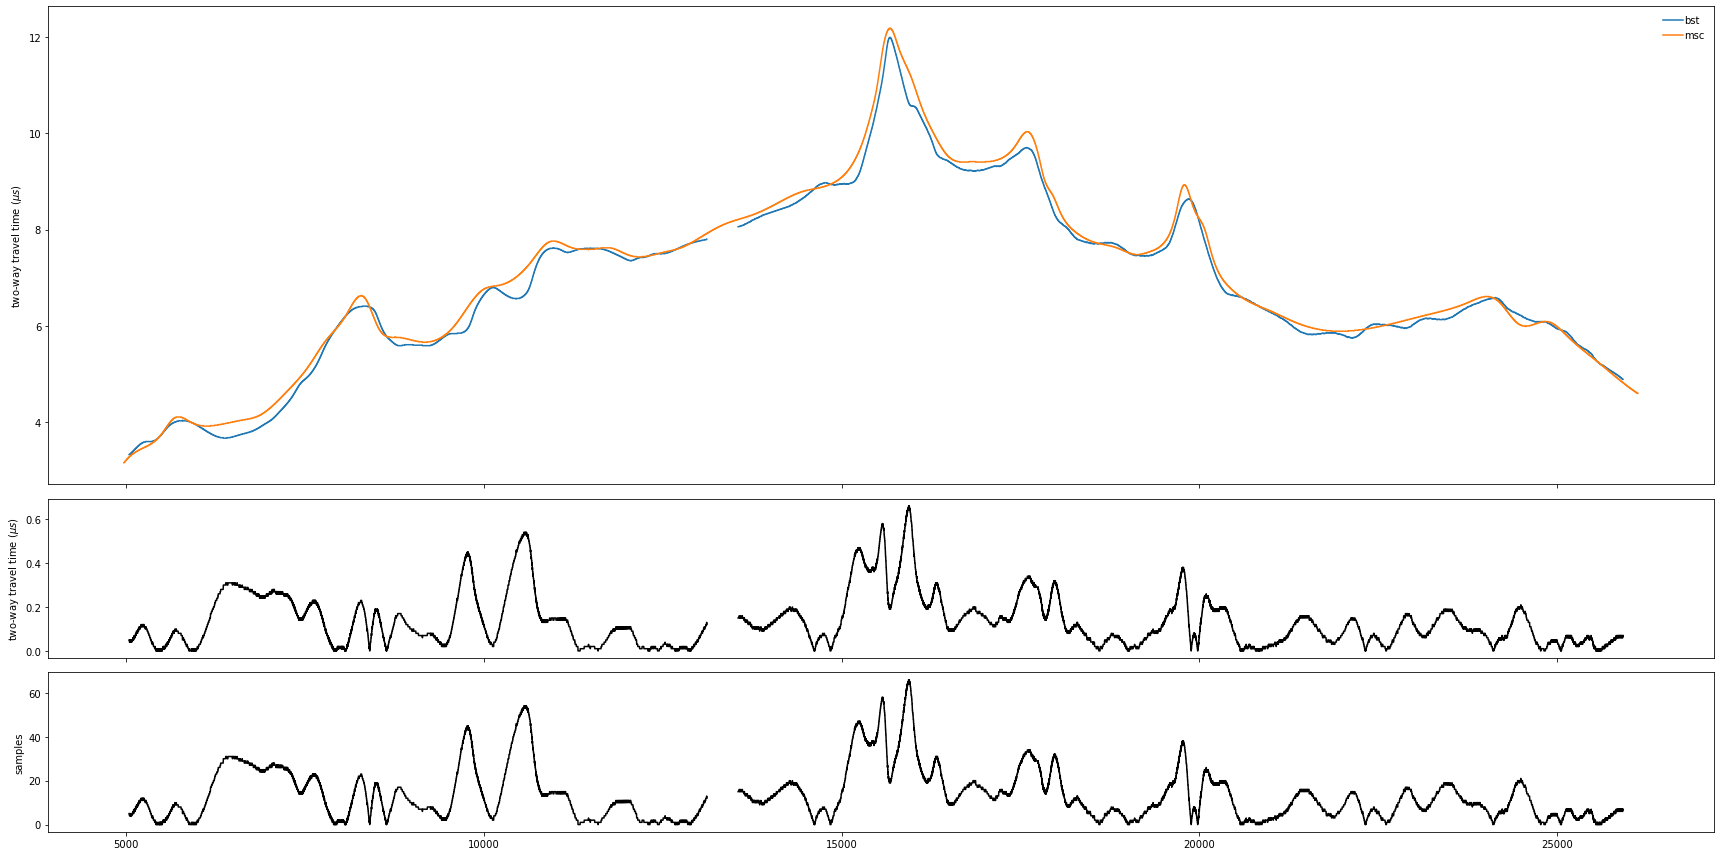

In [6]:
# plot
fig, ax = plt.subplots(3,1,gridspec_kw={'height_ratios': [3, 1, 1]}, sharex=True)
# upper plot bed elevation
ax[0].plot(twtt_f1*1e6, label="bst")
ax[0].plot(twtt_f2*1e6, label="msc")
ax[0].legend(loc="upper right",fancybox=True, framealpha=0,ncol=1,handletextpad=0.1)
ax[0].set_ylabel("two-way travel time " +  r'$(\mu s)$')

ax[1].plot(dtwtt*1e6, 'k')
ax[1].set_ylabel("two-way travel time " +  r'$(\mu s)$')

ax[2].plot(dsmpl, 'k')
ax[2].set_ylabel("samples")

fig.tight_layout()

In [9]:
# calculate d_elev corresponding to dtwtt

# twtt2depth function
def twtt2depth(twtt, asep, eps_r=3.15):
    C = 3e8
    v = C/np.sqrt(eps_r)
    depth = np.sqrt((v / 2 * (twtt + (asep / C)))**2 - (asep / 2)**2)       # convert travel time to depth, accounting for any antenna separation - if asetp==0 then simplifies to depth = twtt*v/2 (EQ 1 from Armstrong et al., 2022)
    return depth

h1 = twtt2depth(twtt_f1, 0, 3.15)
h2 = twtt2depth(twtt_f2, 0, 3.15)
dh = np.abs(h1 - h2)

In [10]:
df = pd.DataFrame(dh)
df.describe()

,0
count,20440.000000
mean,11.366126
std,9.930644
min,0.000000
25%,4.225771
50%,8.451543
75%,16.057931
max,55.780181


In [32]:
# get ice thickness percentage of largest delev value
idx = np.nanargmax(dh)
print(h1[idx],h2[idx])

898.398972776413 954.1791535884952


In [64]:
print('median thickness difference:\t',
str(round(np.nanquantile(dh,.5),2)),
' m,\t', 
str(round(100*np.nanmedian(dh)/np.nanmedian(h1),2)),
' %\nmaximum thickness difference:\t',
str(round(dh[idx],2)),
' m,\t'
,str(round(100*dh[idx]/h1[idx],2)),' %')


median thickness difference:	 8.45  m,	 1.52  %
maximum thickness difference:	 55.78  m,	 6.21  %


In [66]:
# get thickness disagremeent percentage
diff_percent = (dh / h2)*100

In [67]:
print(str(round(np.nanquantile(diff_percent,.5),2)) + ", " + str(round(np.nanquantile(diff_percent,.75) - np.nanquantile(diff_percent,.25),2)) + ' IQR m')

1.5, 1.94 IQR m


In [65]:
print(np.nanmin(diff_percent), np.nanmax(diff_percent))

0.0 7.788944723618103


In [23]:
print(idx)
idx = np.nanargmax(diff_percent)
print(idx)

15936
6359


(array([1.823e+03, 1.664e+03, 1.376e+03, 1.207e+03, 1.674e+03, 1.433e+03,
        1.677e+03, 1.444e+03, 1.061e+03, 7.050e+02, 6.830e+02, 7.190e+02,
        7.130e+02, 7.050e+02, 3.900e+02, 2.970e+02, 1.710e+02, 2.020e+02,
        1.960e+02, 2.390e+02, 1.310e+02, 8.700e+01, 1.050e+02, 7.500e+01,
        5.000e+01, 7.300e+01, 3.400e+01, 5.900e+01, 7.500e+01, 1.120e+02,
        7.800e+01, 8.400e+01, 1.410e+02, 1.430e+02, 1.540e+02, 1.100e+02,
        1.000e+00, 5.400e+01, 2.700e+01, 7.000e+01, 6.500e+01, 3.000e+01,
        3.100e+01, 6.200e+01, 1.800e+01, 1.040e+02, 5.200e+01, 1.500e+01,
        8.000e+00, 1.300e+01]),
 array([ 0.        ,  0.33921772,  0.67843545,  1.01765317,  1.3568709 ,
         1.69608862,  2.03530634,  2.37452407,  2.71374179,  3.05295952,
         3.39217724,  3.73139496,  4.07061269,  4.40983041,  4.74904814,
         5.08826586,  5.42748358,  5.76670131,  6.10591903,  6.44513675,
         6.78435448,  7.1235722 ,  7.46278993,  7.80200765,  8.14122537,
         8.

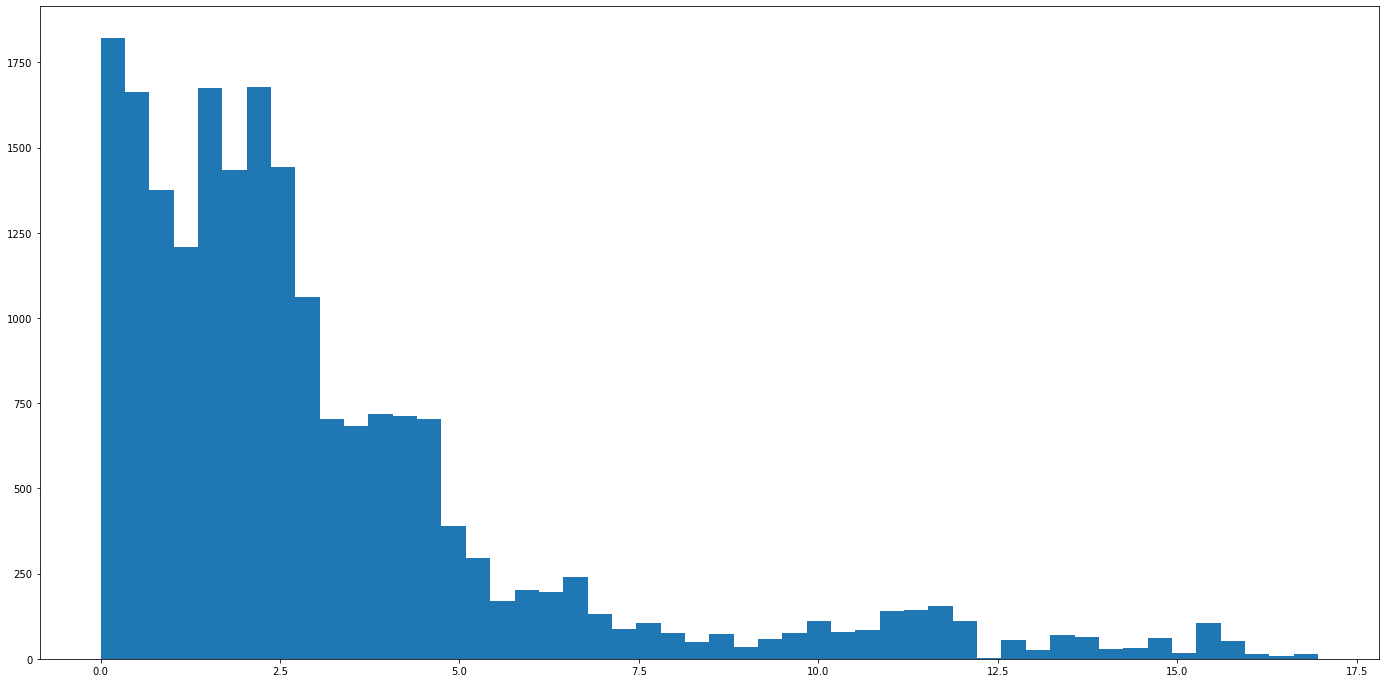

In [23]:
plt.hist(diff_percent,bins=50)